In [343]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import pylab as plt
import seaborn as sns

%matplotlib inline


In [344]:
df_muestra = pd.read_csv('muestra.csv')


In [345]:
df_muestra.head()


,id,Price
0,0,2759145
1,1,10926785
2,2,20212944
3,3,46541311
4,4,46335226


In [346]:
df_test = pd.read_csv('test.csv')


In [347]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg


In [348]:
df_train = pd.read_csv('train.csv')

In [349]:
df_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [350]:
nulos = df_test.isnull().sum()
nulos


Manufacturer                 0
Model Name                   0
Category                     0
Screen Size                  0
Screen                       0
CPU                          0
RAM                          0
 Storage                     0
GPU                          0
Operating System             0
Operating System Version    34
Weight                       0
dtype: int64

In [351]:
nulostrain = df_train.isnull().sum()
nulostrain

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [352]:
df_train["Operating System Version"].fillna("unknown", inplace=True)
df_train.head()


,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,unknown,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,unknown,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,unknown,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,unknown,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,unknown,1.37kg,16037611.20


In [353]:
df_test["Operating System Version"].fillna("unknown", inplace=True)
pd.set_option('display.max_rows', None)

df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg


In [354]:
manufacturer_counts = df_train["Manufacturer"].value_counts()
manufacturer_counts

Dell         232
Lenovo       226
HP           179
Asus         122
Acer          83
Toshiba       39
MSI           34
Apple         17
Samsung        8
Mediacom       7
Microsoft      6
Razer          5
Xiaomi         4
Chuwi          3
Google         3
LG             3
Huawei         2
Vero           2
Fujitsu        2
Name: Manufacturer, dtype: int64

In [355]:
df_train_encoded = pd.get_dummies(df_train, columns=["Category"])

# Muestra el nuevo dataframe con las variables numéricas codificadas
print(df_train_encoded.head())

  Manufacturer   Model Name Screen Size                              Screen  \
0        Apple  MacBook Pro       13.3"  IPS Panel Retina Display 2560x1600   
1        Apple  Macbook Air       13.3"                            1440x900   
2           HP       250 G6       15.6"                   Full HD 1920x1080   
3        Apple  MacBook Pro       15.4"  IPS Panel Retina Display 2880x1800   
4        Apple  MacBook Pro       13.3"  IPS Panel Retina Display 2560x1600   

                          CPU   RAM              Storage  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            GPU Operating System Operating System Version  \
0  Intel Iris Plus Graphics 640            macOS                  unknown   
1        I

In [356]:

# Eliminar las comillas de la columna "Screen Size"
df_train_encoded["Screen Size"] = df_train_encoded["Screen Size"].str.replace('"', '')

# Muestra el dataframe con las comillas eliminadas en la columna "Screen Size"
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,unknown,1.37kg,11912523.48,0,0,0,0,1,0
1,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,unknown,1.34kg,7993374.48,0,0,0,0,1,0
2,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,unknown,1.86kg,5112900.00,0,0,0,1,0,0
3,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,unknown,1.83kg,22563005.40,0,0,0,0,1,0
4,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,unknown,1.37kg,16037611.20,0,0,0,0,1,0


In [357]:
df_train_encoded["Screen Size"] = df_train_encoded["Screen Size"].astype(float)

In [358]:
# Eliminar GB de la columna RAM
df_train_encoded["RAM"] = df_train_encoded["RAM"].str.replace('GB', '')

# Muestra el dataframe con las comillas eliminadas en la columna "Screen Size"
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,unknown,1.37kg,11912523.48,0,0,0,0,1,0
1,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,unknown,1.34kg,7993374.48,0,0,0,0,1,0
2,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,unknown,1.86kg,5112900.00,0,0,0,1,0,0
3,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,unknown,1.83kg,22563005.40,0,0,0,0,1,0
4,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,unknown,1.37kg,16037611.20,0,0,0,0,1,0


In [359]:
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,unknown,1.37kg,11912523.48,0,0,0,0,1,0
1,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,unknown,1.34kg,7993374.48,0,0,0,0,1,0
2,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,unknown,1.86kg,5112900.00,0,0,0,1,0,0
3,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,unknown,1.83kg,22563005.40,0,0,0,0,1,0
4,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,unknown,1.37kg,16037611.20,0,0,0,0,1,0


In [360]:
df_train_encoded["RAM"] = df_train_encoded["RAM"].astype(int)

In [361]:
import re

# Eliminar las letras de la columna "Storage"
df_train_encoded[' Storage'] = df_train_encoded[' Storage'].apply(lambda x: re.sub('[^0-9]', '', str(x)))

# Muestra el dataframe con las letras eliminadas en la columna "Storage"
df_train_encoded.head()


,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,unknown,1.37kg,11912523.48,0,0,0,0,1,0
1,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,unknown,1.34kg,7993374.48,0,0,0,0,1,0
2,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,unknown,1.86kg,5112900.00,0,0,0,1,0,0
3,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,unknown,1.83kg,22563005.40,0,0,0,0,1,0
4,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,unknown,1.37kg,16037611.20,0,0,0,0,1,0


In [362]:
df_train_encoded[" Storage"] = df_train_encoded[" Storage"].astype(int)

In [363]:
df_train_encoded["Weight"] = df_train_encoded["Weight"].str.replace('kg', '')
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,unknown,1.37,11912523.48,0,0,0,0,1,0
1,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,unknown,1.34,7993374.48,0,0,0,0,1,0
2,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,unknown,1.86,5112900.00,0,0,0,1,0,0
3,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,unknown,1.83,22563005.40,0,0,0,0,1,0
4,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,unknown,1.37,16037611.20,0,0,0,0,1,0


In [364]:
df_train_encoded["Weight"] = df_train_encoded["Weight"].astype(float)
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,unknown,1.37,11912523.48,0,0,0,0,1,0
1,Apple,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,unknown,1.34,7993374.48,0,0,0,0,1,0
2,HP,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,unknown,1.86,5112900.00,0,0,0,1,0,0
3,Apple,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,unknown,1.83,22563005.40,0,0,0,0,1,0
4,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,unknown,1.37,16037611.20,0,0,0,0,1,0


In [365]:

df_train_encoded = df_train_encoded.drop(columns=["Screen"])

df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,MacBook Pro,13.3,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,unknown,1.37,11912523.48,0,0,0,0,1,0
1,Apple,Macbook Air,13.3,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,unknown,1.34,7993374.48,0,0,0,0,1,0
2,HP,250 G6,15.6,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,unknown,1.86,5112900.00,0,0,0,1,0,0
3,Apple,MacBook Pro,15.4,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,unknown,1.83,22563005.40,0,0,0,0,1,0
4,Apple,MacBook Pro,13.3,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,unknown,1.37,16037611.20,0,0,0,0,1,0


In [366]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train_encoded["Model Name"] = le.fit_transform(df_train_encoded["Model Name"])


In [367]:
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,236,13.3,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,unknown,1.37,11912523.48,0,0,0,0,1,0
1,Apple,237,13.3,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,unknown,1.34,7993374.48,0,0,0,0,1,0
2,HP,38,15.6,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,unknown,1.86,5112900.00,0,0,0,1,0,0
3,Apple,236,15.4,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,unknown,1.83,22563005.40,0,0,0,0,1,0
4,Apple,236,13.3,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,unknown,1.37,16037611.20,0,0,0,0,1,0


In [368]:
df_train_encoded["Price"] = df_train_encoded["Price"].astype(int)
df_train_encoded.head()


,Manufacturer,Model Name,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,Apple,236,13.3,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,unknown,1.37,11912523,0,0,0,0,1,0
1,Apple,237,13.3,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,unknown,1.34,7993374,0,0,0,0,1,0
2,HP,38,15.6,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,unknown,1.86,5112900,0,0,0,1,0,0
3,Apple,236,15.4,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,unknown,1.83,22563005,0,0,0,0,1,0
4,Apple,236,13.3,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,unknown,1.37,16037611,0,0,0,0,1,0


In [369]:


le = LabelEncoder()
df_train_encoded["Manufacturer"] = le.fit_transform(df_train_encoded["Manufacturer"])


In [370]:
df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,1,236,13.3,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,unknown,1.37,11912523,0,0,0,0,1,0
1,1,237,13.3,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,unknown,1.34,7993374,0,0,0,0,1,0
2,7,38,15.6,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,unknown,1.86,5112900,0,0,0,1,0,0
3,1,236,15.4,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,unknown,1.83,22563005,0,0,0,0,1,0
4,1,236,13.3,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,unknown,1.37,16037611,0,0,0,0,1,0


In [371]:
df_train_encoded = df_train_encoded.drop(columns=["CPU" , 'GPU'])

df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,RAM,Storage,Operating System,Operating System Version,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,1,236,13.3,8,128,macOS,unknown,1.37,11912523,0,0,0,0,1,0
1,1,237,13.3,8,128,macOS,unknown,1.34,7993374,0,0,0,0,1,0
2,7,38,15.6,8,256,No OS,unknown,1.86,5112900,0,0,0,1,0,0
3,1,236,15.4,16,512,macOS,unknown,1.83,22563005,0,0,0,0,1,0
4,1,236,13.3,8,256,macOS,unknown,1.37,16037611,0,0,0,0,1,0


In [372]:
Operating_System = df_train["Operating System"].value_counts()
Operating_System

Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: Operating System, dtype: int64

In [373]:
df_train_encoded = df_train_encoded.drop(columns=['Operating System Version'])

df_train_encoded.head()

,Manufacturer,Model Name,Screen Size,RAM,Storage,Operating System,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,1,236,13.3,8,128,macOS,1.37,11912523,0,0,0,0,1,0
1,1,237,13.3,8,128,macOS,1.34,7993374,0,0,0,0,1,0
2,7,38,15.6,8,256,No OS,1.86,5112900,0,0,0,1,0,0
3,1,236,15.4,16,512,macOS,1.83,22563005,0,0,0,0,1,0
4,1,236,13.3,8,256,macOS,1.37,16037611,0,0,0,0,1,0


In [374]:
# Renombrar los valores en la columna 'Operating System'
df_train_encoded['Operating System'] = df_train_encoded['Operating System'].replace(['Mac OS', 'macOS', 'Chrome OS'], 'Mac_Os')


In [375]:
# Renombrar los valores en la columna 'Operating System'
df_train_encoded['Operating System'] = df_train_encoded['Operating System'].replace(['No OS', 'Linux'], 'NO_OS')


In [376]:
df_train_encoded['Operating System'] = df_train_encoded['Operating System'].replace(['Windows', 'Android'], 'WindowS')


In [377]:
Operating_System = df_train_encoded["Operating System"].value_counts()
Operating_System

WindowS    838
NO_OS      100
Mac_Os      39
Name: Operating System, dtype: int64

In [378]:
screen_mapping = {"Mac_Os": 3, "WindowS": 2, "NO_OS": 1}
df_train_encoded["Operating System"] = df_train_encoded["Operating System"].map(screen_mapping)
df_train_encoded.head()


,Manufacturer,Model Name,Screen Size,RAM,Storage,Operating System,Weight,Price,Category_2 in 1 Convertible,Category_Gaming,Category_Netbook,Category_Notebook,Category_Ultrabook,Category_Workstation
0,1,236,13.3,8,128,3,1.37,11912523,0,0,0,0,1,0
1,1,237,13.3,8,128,3,1.34,7993374,0,0,0,0,1,0
2,7,38,15.6,8,256,1,1.86,5112900,0,0,0,1,0,0
3,1,236,15.4,16,512,3,1.83,22563005,0,0,0,0,1,0
4,1,236,13.3,8,256,3,1.37,16037611,0,0,0,0,1,0


In [379]:
df_train_encoded.shape

(977, 14)

In [380]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Manufacturer                 977 non-null    int32  
 1   Model Name                   977 non-null    int32  
 2   Screen Size                  977 non-null    float64
 3   RAM                          977 non-null    int32  
 4    Storage                     977 non-null    int32  
 5   Operating System             977 non-null    int64  
 6   Weight                       977 non-null    float64
 7   Price                        977 non-null    int32  
 8   Category_2 in 1 Convertible  977 non-null    uint8  
 9   Category_Gaming              977 non-null    uint8  
 10  Category_Netbook             977 non-null    uint8  
 11  Category_Notebook            977 non-null    uint8  
 12  Category_Ultrabook           977 non-null    uint8  
 13  Category_Workstation

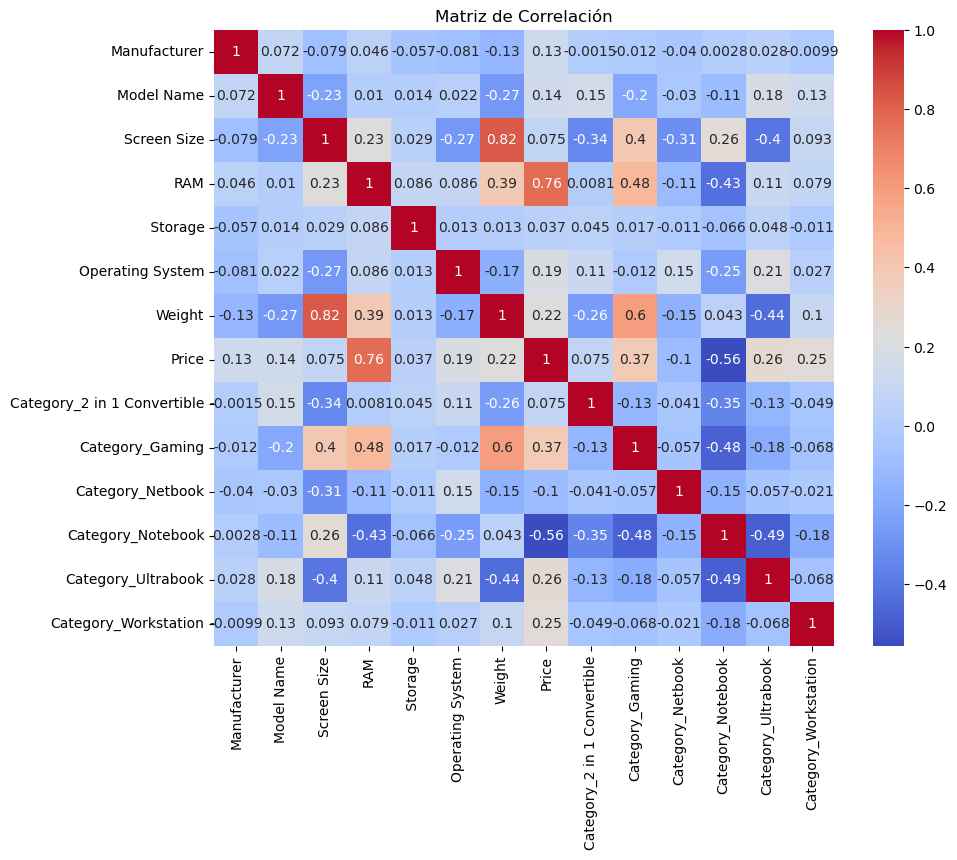

In [381]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df_train_encoded.corr()

# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots(figsize=(10, 8))

# Generar el mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)

# Configurar el título del gráfico
ax.set_title("Matriz de Correlación")

# Mostrar el gráfico
plt.show()


In [382]:
df_train_encoded = df_train_encoded.drop(columns=['RAM', 'Screen Size'])


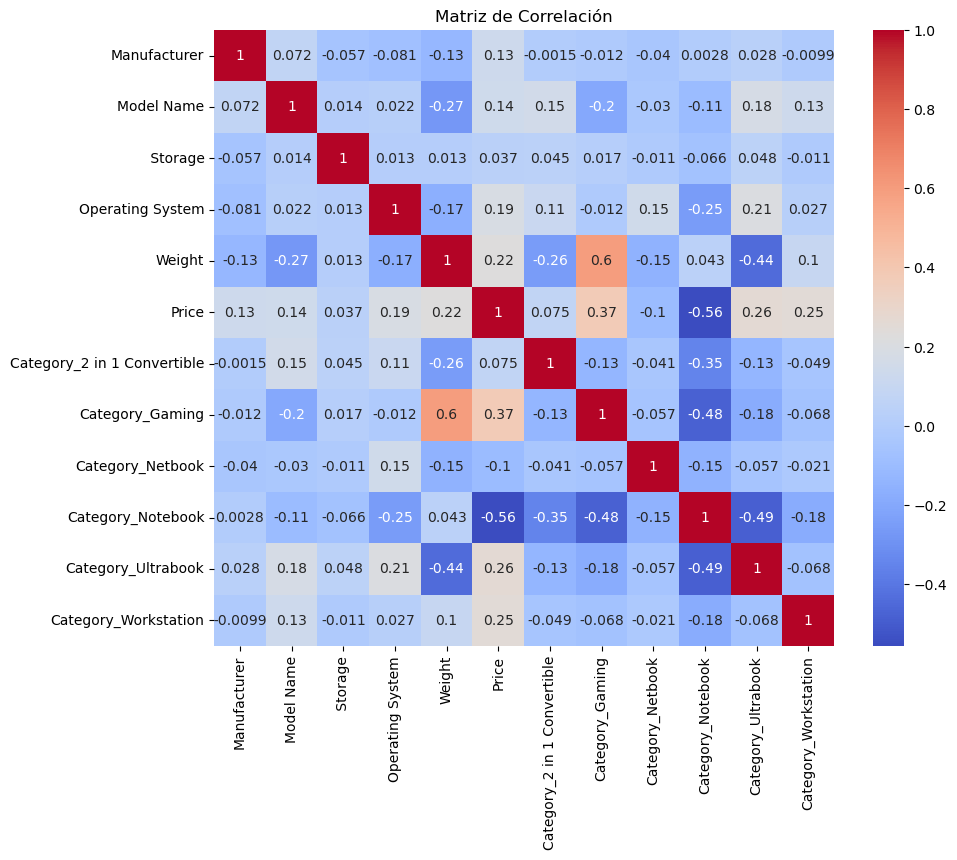

In [387]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df_train_encoded.corr()

# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots(figsize=(10, 8))

# Generar el mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)

# Configurar el título del gráfico
ax.set_title("Matriz de Correlación")

# Mostrar el gráfico
plt.show()

In [383]:

from sklearn.ensemble import RandomForestRegressor as RFR

In [384]:
df_train_encoded.to_csv('df_train_encoded.csv')
df_test.to_csv('df_test.csv')

In [399]:

from sklearn.model_selection import train_test_split

# Dividir el dataframe en características (X) y etiquetas (y)
X = df_train_encoded.drop("Price", axis=1)
y = df_train_encoded["Price"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

# Crear el modelo de Random Forest Regressor
random_forest = RFR()


# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Calcular el coeficiente de determinación (R2)
r2_score = random_forest.score(X_test, y_test)

print("Coeficiente de determinación (R2):", r2_score)


Coeficiente de determinación (R2): 0.8256892940965552
